### ELE075 - Sistemas Nebulos
**Aluna:** Thais Macela de Lira Menegaldi <br>
**Matrícula**: 2017001702

# Atividade Prática 2 - Inferência Fuzzy

In [1]:
# pip install -U scikit-fuzzy
import skfuzzy
import numpy as np
import matplotlib.pyplot as plt

Para o modelo de Sugeno as regras são definidas da seguinte maneira:

**SE** $ x_1 $ é $A_{1i}$ e $x_{2}$ é $A_{2i}$ e ... $x_n$ é $A_{ni}$, **ENTÃO** $y = f_{i}(x_{1}, x_{2}, .., x_{n})$

Em que $A_{1i}, A_{2i}, ..., A_{in}$ representam os conjuntos fuzzy antecedente, já o consequente é uma função das variáveis de entrada. Geralmente, as funções $f_i$ são polinomiais, e, quando $f_i$ se trata de polinômios de ordem 1, tem-se um modelo Sugeno.<br>

Dada uma entrada ($x_{1}, x_{2}, ..., x_{n}$), a saída será determinada por:

$$y = \dfrac{\sum_{i=1}^{k} w_{i}f_{i}(x_1, x_2, ..., x_n)}{\sum_{i=1}^{k}w_i}$$

Onde $w_i = \varphi A_{1i}(x_{1}) \Delta \varphi A_{2i}(x_{2}) \Delta ... \varphi A_{ni}(x_n) \Delta, \forall i = 1, ...., k$ representam as ativações de cada uma das regras fuzzy.

## Questão 2 - Aproximação do Cosseno por meio do mecanismo de inferência de Sugeno

Para $y = cos(x)$ no intervalo $x \in [\frac{-\pi}{2}, \frac{3\pi}{2}]$

In [2]:
x = np.linspace(start = -np.pi/2, stop = 3*np.pi/2, num = 100)
y = np.cos(x)

Serão utilizados 3 consequentes de primeira ordem, que são apresentados abaixo:

A reta $A_1$ tem equação $y_1 = \frac{2}{\pi}x + 1$

In [3]:
x1 = np.linspace(start = -np.pi/2, stop = 0, num = 100)
y1 = 2/np.pi*x1 + 1

A reta $A_2$ tem equação $y_2 = \frac{-2}{\pi}x + 1$

In [4]:
x2 = np.linspace(start = 0, stop = np.pi, num = 100)
y2 = -2/np.pi*x2 + 1

A reta $A_3$ tem equação $y_3 = \frac{2}{\pi}x - 3$

In [5]:
x3 = np.linspace(start = np.pi, stop = 3*np.pi/2, num = 100)
y3 = 2/np.pi*x3 - 3

Resultando em:

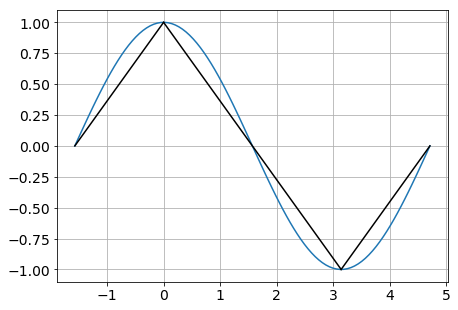

In [6]:
plt.figure(figsize = (7,5))
plt.plot(x, y)
plt.plot(x1, y1, 'black')
plt.plot(x2, y2, 'black')
plt.plot(x3, y3, 'black')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.show()

Desse modo, as regras do modelo são definidas como:
- **SE** $x_1$ é $A_1$, **ENTÃO** $y_1 = \frac{2}{\pi}x + 1$
- **SE** $x_2$ é $A_2$, **ENTÃO** $y_2 = \frac{-2}{\pi}x + 1$
- **SE** $x_3$ é $A_3$, **ENTÃO** $y_3 = \frac{2}{\pi}x - 3$

A *fuzzyficação* da variável $x$ foi do tipo triangular e foi modelada da seguinte maneira:

$\mu_{A_1} = trimf\big(\big[\frac{-3 \pi}{2} \frac{-\pi}{2} \frac{\pi}{2}\big]\big)$

In [7]:
muA1 = skfuzzy.trimf(x = x, abc = [-3*np.pi/2, -np.pi/2, np.pi/2])

$\mu_{A_2} = trimf\big(\big[\frac{-\pi}{2} \frac{\pi}{2} \frac{3\pi}{2}\big]\big)$

In [8]:
muA2 = skfuzzy.trimf(x = x, abc = [-np.pi/2, np.pi/2, 3*np.pi/2])

$\mu_{A_3} = trimf\big(\big[\frac{\pi}{2} \frac{3\pi}{2} \frac{5 \pi}{2}\big]\big)$

In [9]:
muA3 = skfuzzy.trimf(x = x, abc = [np.pi/2, 3*np.pi/2, 5*np.pi/2])

O resultado dessa *fuzzyficação* é ilustrado a seguir.

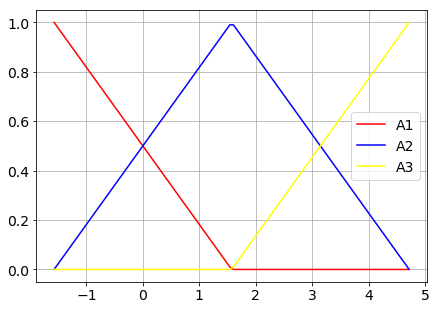

In [10]:
plt.figure(figsize = (7,5))
plt.plot(x, muA1, 'red', label = 'A1')
plt.plot(x, muA2, 'blue', label = 'A2')
plt.plot(x, muA3, 'yellow', label = 'A3')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.show()

Cada regra do modelo determina um grau de ativação $w_1, w_2, w_3$, correspondente ao valor que a regra terá ao longo do intervalo de $x$. Sendo assim, a saída $\hat{y}$ do modelo será calculada como uma média ponderada:

$$\hat{y} = \dfrac{w_1 y_1 + w_2 y_2 + w_3 y_3}{w_1 + w_2 + w_3} $$

In [11]:
y1 = 2/np.pi*x + 1
y2 = -2/np.pi*x + 1
y3 = 2/np.pi*x - 3
w1 = muA1
w2 = muA2
w3 = muA3

In [12]:
y_approx = (w1 * y1 + w2 * y2 + w3 * y3)/(w1 + w2 + w3)

A comparação entre a função cosseno e a função aproximada resultante do modelo é apresentada a seguir:

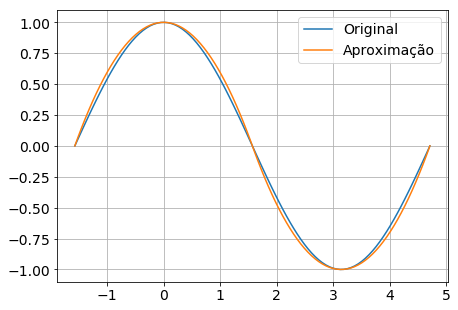

In [13]:
plt.figure(figsize = (7,5))
plt.plot(x, y, label = 'Original')
plt.plot(x, y_approx, label = 'Aproximação')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.show()

O erro médio quadrático entre $y$ e $\hat{y}$ é:

In [14]:
MSE = np.mean(np.square(y - y_approx))
print('Mean Squared Error (MSE):', MSE)

Mean Squared Error (MSE): 0.0012713879770074492


## Questão 3 - Aproximação do Seno por meio do mecanismo de inferência de Sugeno

Para $y = sen(x)$ no intervalo $x \in [0, 2\pi]$

In [15]:
x = np.linspace(start = 0, stop = 2*np.pi, num = 100)
y = np.sin(x)

Serão utilizados, também, 3 consequentes de primeira ordem, tal que:

A reta $A_1$ tem equação $y_1 = \frac{2}{\pi}x$

In [16]:
x1 = np.linspace(start = 0, stop = np.pi/2, num = 100)
y1 = 2/np.pi*x1

A reta $A_2$ tem equação $y_2 = \frac{-2}{\pi}x + 2$

In [17]:
x2 = np.linspace(start = np.pi/2, stop = 3*np.pi/2, num = 100)
y2 = -2/np.pi*x2 + 2

A reta $A_3$ tem equação $y_3 = \frac{2}{\pi}x - 4$

In [18]:
x3 = np.linspace(start = 3*np.pi/2, stop = 2*np.pi, num = 100)
y3 = 2/np.pi*x3 - 4

Resultando em:

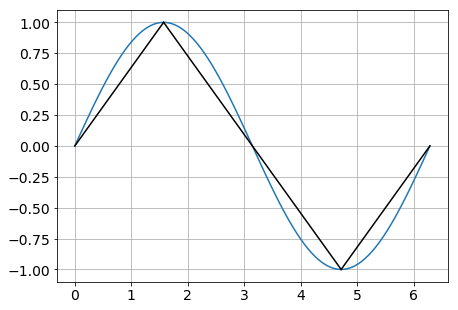

In [19]:
plt.figure(figsize = (7,5))
plt.plot(x, y)
plt.plot(x1, y1, 'black')
plt.plot(x2, y2, 'black')
plt.plot(x3, y3, 'black')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.show()

Portanto, as regras do modelo são definidas de modo que:
- **SE** $x_1$ é $A_1$, **ENTÃO** $y_1 = \frac{2}{\pi}x$
- **SE** $x_2$ é $A_2$, **ENTÃO** $y_2 = \frac{-2}{\pi}x + 2$
- **SE** $x_3$ é $A_3$, **ENTÃO** $y_3 = \frac{2}{\pi}x - 4$

A *fuzzyficação* da variável $x$ foi do tipo triangular e foi modelada do seguinte modo:

$\mu_{A_1} = trimf([-\pi \ 0 \ \pi])$

In [20]:
muA1 = skfuzzy.trimf(x = x, abc = [-np.pi, 0, np.pi])

$\mu_{A_2} = trimf([0 \ \pi \ 2\pi])$

In [21]:
muA2 = skfuzzy.trimf(x = x, abc = [0, np.pi, 2*np.pi])

$\mu_{A_3} = trimf([\pi \ 2\pi \ 3\pi])$

In [22]:
muA3 = skfuzzy.trimf(x = x, abc = [np.pi, 2*np.pi, 3*np.pi])

O resultado dessa *fuzzyficação* é mostrado abaixo.

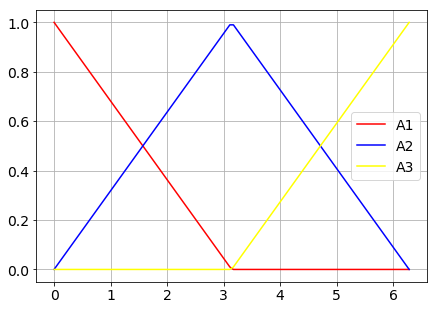

In [23]:
plt.figure(figsize = (7,5))
plt.plot(x, muA1, 'red', label = 'A1')
plt.plot(x, muA2, 'blue', label = 'A2')
plt.plot(x, muA3, 'yellow', label = 'A3')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.show()

Semelhante ao modelo anterior, a saída $\hat{y}$ será calculada como uma média ponderada:

$$\hat{y} = \dfrac{w_1 y_1 + w_2 y_2 + w_3 y_3}{w_1 + w_2 + w_3} $$

In [24]:
y1 = 2/np.pi*x
y2 = -2/np.pi*x + 2
y3 = 2/np.pi*x - 4
w1 = muA1
w2 = muA2
w3 = muA3

In [25]:
y_approx = (w1 * y1 + w2 * y2 + w3 * y3)/(w1 + w2 + w3)

A comparação entre a função seno e a função aproximada é apresentada abaixo:

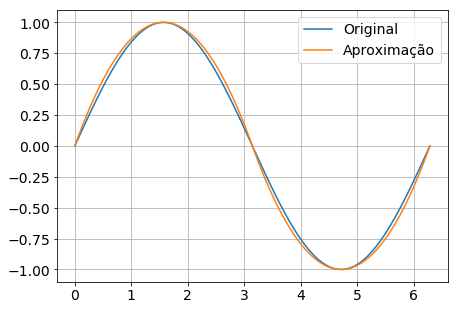

In [26]:
plt.figure(figsize = (7,5))
plt.plot(x, y, label = 'Original')
plt.plot(x, y_approx, label = 'Aproximação')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.show()

O valor do erro médio quadrático entre $y$ e $\hat{y}$ é:

In [27]:
MSE = np.mean(np.square(y - y_approx))
print('Mean Squared Error (MSE):', MSE)

Mean Squared Error (MSE): 0.001271387977007449


## Questão 4 - Problema da Gorjeta

O problema da gorjeta será definido com base nas seguintes regras:
- **se** o serviço é ruim **ou** a comida é de má qualidade, **então** a gorjeta é pequena
- **se** o serviço é bom, **então** a gorjeta é média
- **se** o serviço é excelente **ou** a comida é deliciosa, **então** a gorjeta é generosa

E, também, assumindo que:
- uma gorjeta pequena equivale a 5% do valor da conta
- uma gorjeta média equivale a 15% do valor da conta
- uma gorjeta generosa equivale a 25% do valor da conta

Isto posto, foi construído um sistema nebuloso utilizando o mecanismo de inferência de Sugeno para modelar a relação entre as variáveis serviço, comida, e gorjeta.

Partindo das considerações feitas acima, foi feita a fuzzificação triangular da variáveis, conforme a seguir.

Para a variável serviço, definida em um intervalo $x \in [0,10]$:

In [28]:
x_service = x = np.arange(0, 11, 1)

service_low = skfuzzy.trimf(x = x_service, abc = [0, 0, 5])
service_medium = skfuzzy.trimf(x = x_service, abc = [0, 5, 10])
service_high = skfuzzy.trimf(x = x_service, abc = [5, 10, 10])

Resultando em:

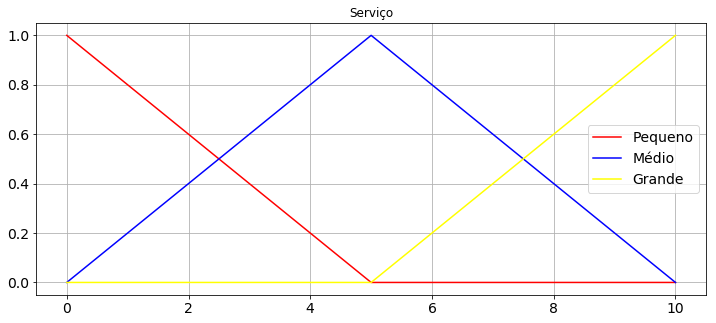

In [29]:
plt.figure(figsize = (12,5))
plt.plot(x_service, service_low, 'red', label = 'Pequeno')
plt.plot(x_service, service_medium, 'blue', label = 'Médio')
plt.plot(x_service, service_high, 'yellow', label = 'Grande')
plt.title('Serviço')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.show()

Para a variável comida, definida em um intervalo $x \in [0,10]$

In [30]:
x_food = np.arange(0, 11, 1)

food_low = skfuzzy.trimf(x = x_food, abc = [0, 0, 5])
food_medium = skfuzzy.trimf(x = x_food, abc = [0, 5, 10])
food_high = skfuzzy.trimf(x = x_food, abc = [5, 10, 10])

Resultando em:

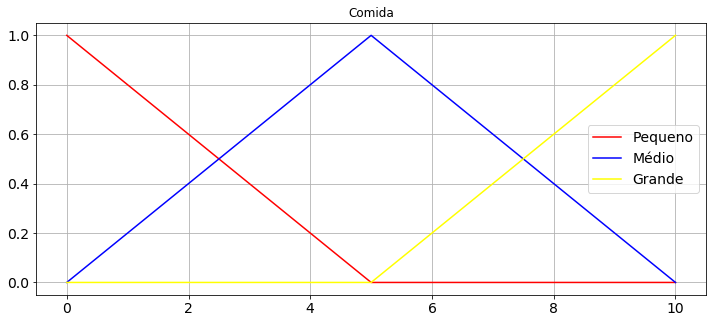

In [31]:
plt.figure(figsize = (12,5))
plt.plot(x_food, food_low, 'red', label = 'Pequeno')
plt.plot(x_food, food_medium, 'blue', label = 'Médio')
plt.plot(x_food, food_high, 'yellow', label = 'Grande')
plt.title('Comida')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.show()

Para a variável gorjeta, definida em um intervalo $x \in [0,25]$

In [32]:
x_tip = np.arange(0, 26, 1)

tip_low = skfuzzy.trimf(x = x_tip, abc = [0, 0, 14])
tip_medium = skfuzzy.trimf(x = x_tip, abc = [0, 14, 25])
tip_high = skfuzzy.trimf(x = x_tip, abc = [14, 25, 25])

Resultando em:

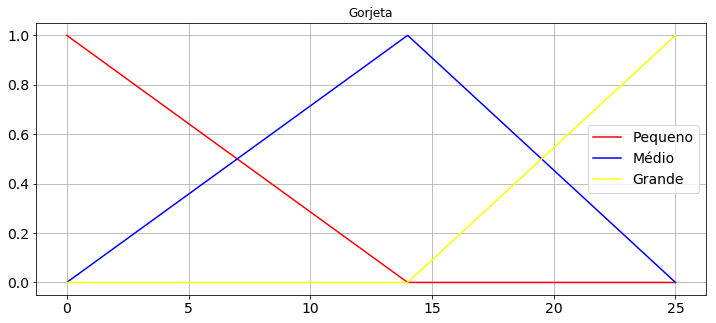

In [33]:
plt.figure(figsize = (12,5))
plt.plot(x_tip, tip_low, 'red', label = 'Pequeno')
plt.plot(x_tip, tip_medium, 'blue', label = 'Médio')
plt.plot(x_tip, tip_high, 'yellow', label = 'Grande')
plt.title('Gorjeta')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.show()


Similar ao que foi feito anteriormente, a saída $\hat{y}$ será calculada como uma média ponderada. Entretanto, como existem duas regras em que se tem dois antecedentes, os pesos que serão utilizados pela média ponderada serão calculados como a seguir:

Dado que:
- **se** o serviço é ruim **ou** a comida é de má qualidade, **então** a gorjeta é pequena

o peso $w_1$ será: <br>
$w_1 = max(\mu_{service\_low}, \mu_{food\_low})$

In [34]:
w1 = np.maximum(service_low, food_low)

Sabendo que:
- **se** o serviço é bom, **então** a gorjeta é média

o peso $w_2$ será: <br>
$w_2 = \mu_{service\_medium}$

In [35]:
w2 = service_medium

Tendo em vista que:

- **se** o serviço é excelente **ou** a comida é deliciosa, **então** a gorjeta é generosa

o peso $w_3$ será: <br>
$w_3 = max(\mu_{service\_high}, \mu_{food\_high})$

In [36]:
w3 = np.maximum(service_high, food_high)

As retas $y_1$, $y_2$ e $y_3$ foram definidas a partir de uma tentativa de aproximação tangencial da curva esperada para a saída da gorjeta. Sendo assim, tem-se que:

$y_1 = 0.025 x_1 + 0.05$, $x \in [0,4]$

In [37]:
x1 = np.arange(0,5,1)
y1 = 0.025*x1 + 0.05

$y_2 = \frac{0.15 x_2}{x2}$, $x \in [4,8]$

In [38]:
x2 = np.arange(4,9,1)
y2 = 0.15 * x2/x2

$y_3 = 0.025 x_3$, $x \in [8,10]$

In [39]:
x3 = np.arange(8,11,1)
y3 = 0.025*x3

O que resulta em:

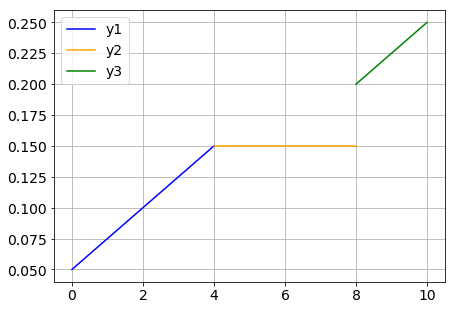

In [40]:
plt.figure(figsize = (7,5))
plt.plot(x1, y1, 'blue', label = 'y1')
plt.plot(x2, y2, 'orange', label = 'y2')
plt.plot(x3, y3, 'green', label = 'y3')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.show()

Finalmente, <br>
$$\hat{y} = \dfrac{w_1 y_1 + w_2 y_2 + w_3 y_3}{w_1 + w_2 + w_3} $$

In [41]:
x = np.linspace(start = 0.1, stop = 10, num = 11)
y1 = 0.025 * x + 0.05
y2 = 0.15 * x/x 
y3 = 0.025 * x

In [42]:
y_approx = (w1 * y1 + w2 * y2 + w3 * y3)/(w1 + w2 + w3)

A aproximação resultante foi:

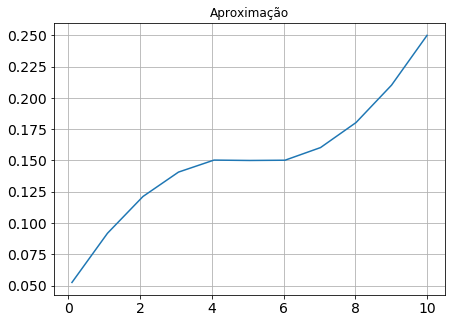

In [43]:
plt.figure(figsize = (7,5))
plt.plot(x, y_approx)
plt.title('Aproximação')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.show()

A aproximação resultante não ficou tão bem aproximada à curva esperada. Isso deve-se ao fato de que as retas $y_1$, $y_2$ e $y_3$ foram escolhidas sem o uso de um método computacional preciso. Entretanto, pode ser considerada razoável, uma vez que aproxima a tendência do formato da curva esperada.